In [1]:
import pandas as pd
import os
import datetime
import calendar
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.stats import skew


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Read Data

In [2]:
train_df = pd.read_csv('../input/dry-beans-classification-iti-ai-pro-intake01/train.csv')
test_df = pd.read_csv('../input/dry-beans-classification-iti-ai-pro-intake01/test.csv')


# EDA

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [4]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10834.0,5416.500000,3127.650742,0.000000,2708.250000,5416.500000,8124.750000,10833.000000
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195


In [5]:
train_df.duplicated().count()

10834

In [6]:
train_df.isna().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

In [7]:
beans = {0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'}
def decode(df,column):
    df[column] = df[column].map(beans)
    return df
def encode(df,column):
    #label encoding 
    c = df[column].astype('category')
    df[column] = c.cat.codes
    d = dict(enumerate(c.cat.categories))
    #print (d)
    return df


In [8]:
train_df = encode(train_df,"y")
#data = pd.read_csv("../input/dry-bean-dataset/Dry_Bean.csv")
#data.head(5)

# Visualization

<AxesSubplot:>

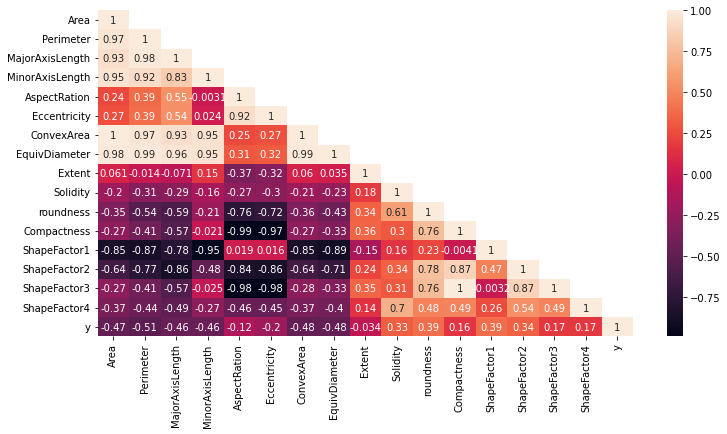

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
cormat= train_df.drop(columns=['ID']).corr()
mask = np.array(cormat)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(cormat,mask=mask,annot = True)

**Sorted correlation of variables to the target**

In [10]:
df1Corr=pd.DataFrame(train_df.corr().unstack().sort_values(ascending=False)['y'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))


,Correlation to the target
y,1.000000
ShapeFactor1,0.392398
roundness,0.387003
ShapeFactor2,0.338889
Solidity,0.327622
ShapeFactor4,0.172578
ShapeFactor3,0.172462
Compactness,0.161121
ID,-0.001609
Extent,-0.034010


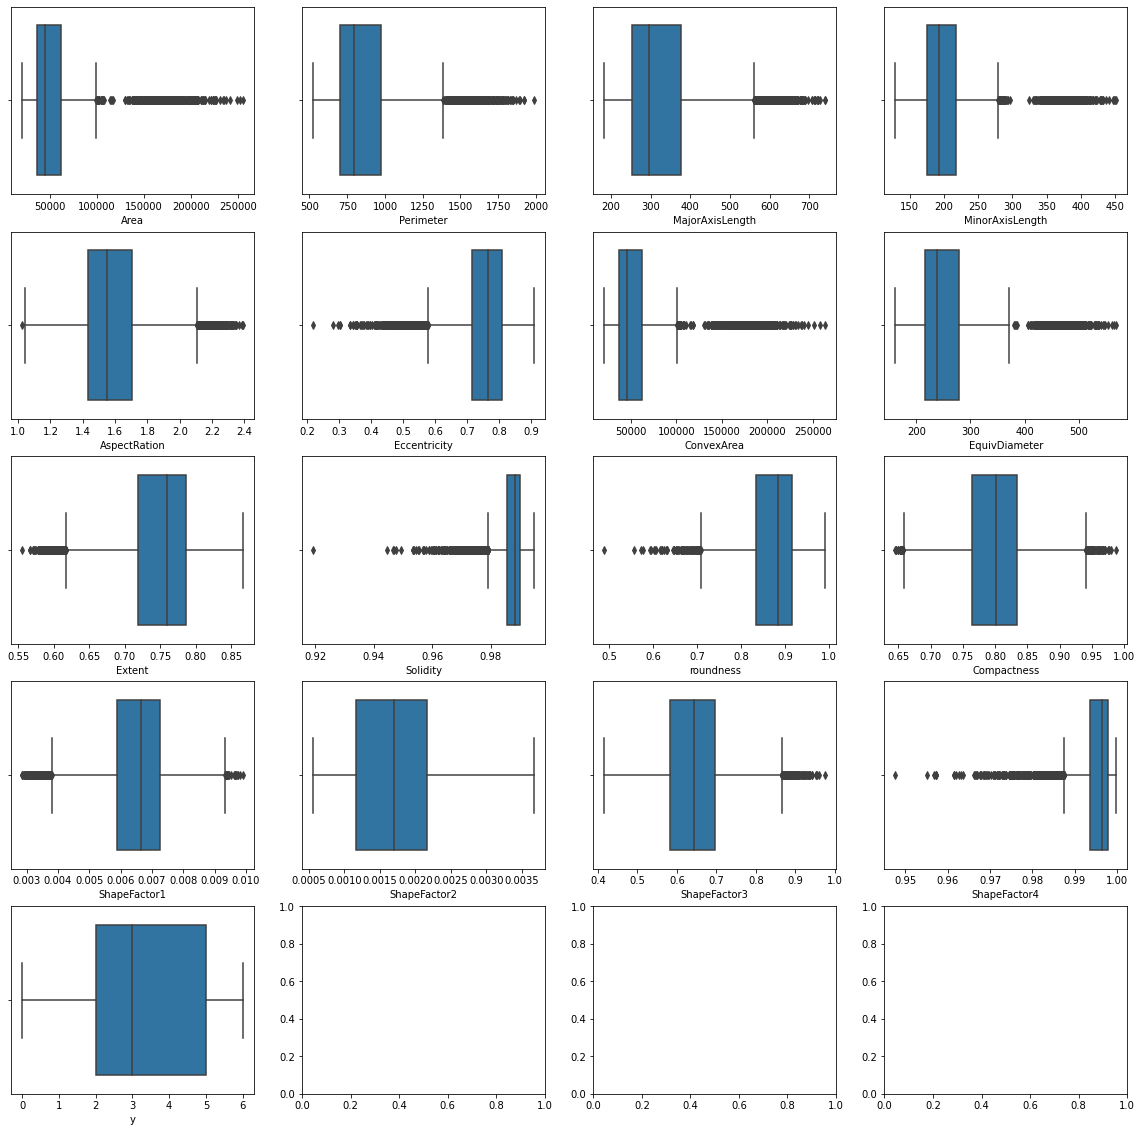

In [11]:
#train_df = prepro(train_df)
r = 5
c = 4
fig, axs = plt.subplots(r, c, figsize=(20, 20))

i = 0
j = 0
for column in train_df.drop(['ID'], axis=1).columns:
    sns.boxplot(train_df[column], ax=axs[i, j])

    if(j == c-1):
        j = 0
        i += 1
    else:
        j += 1

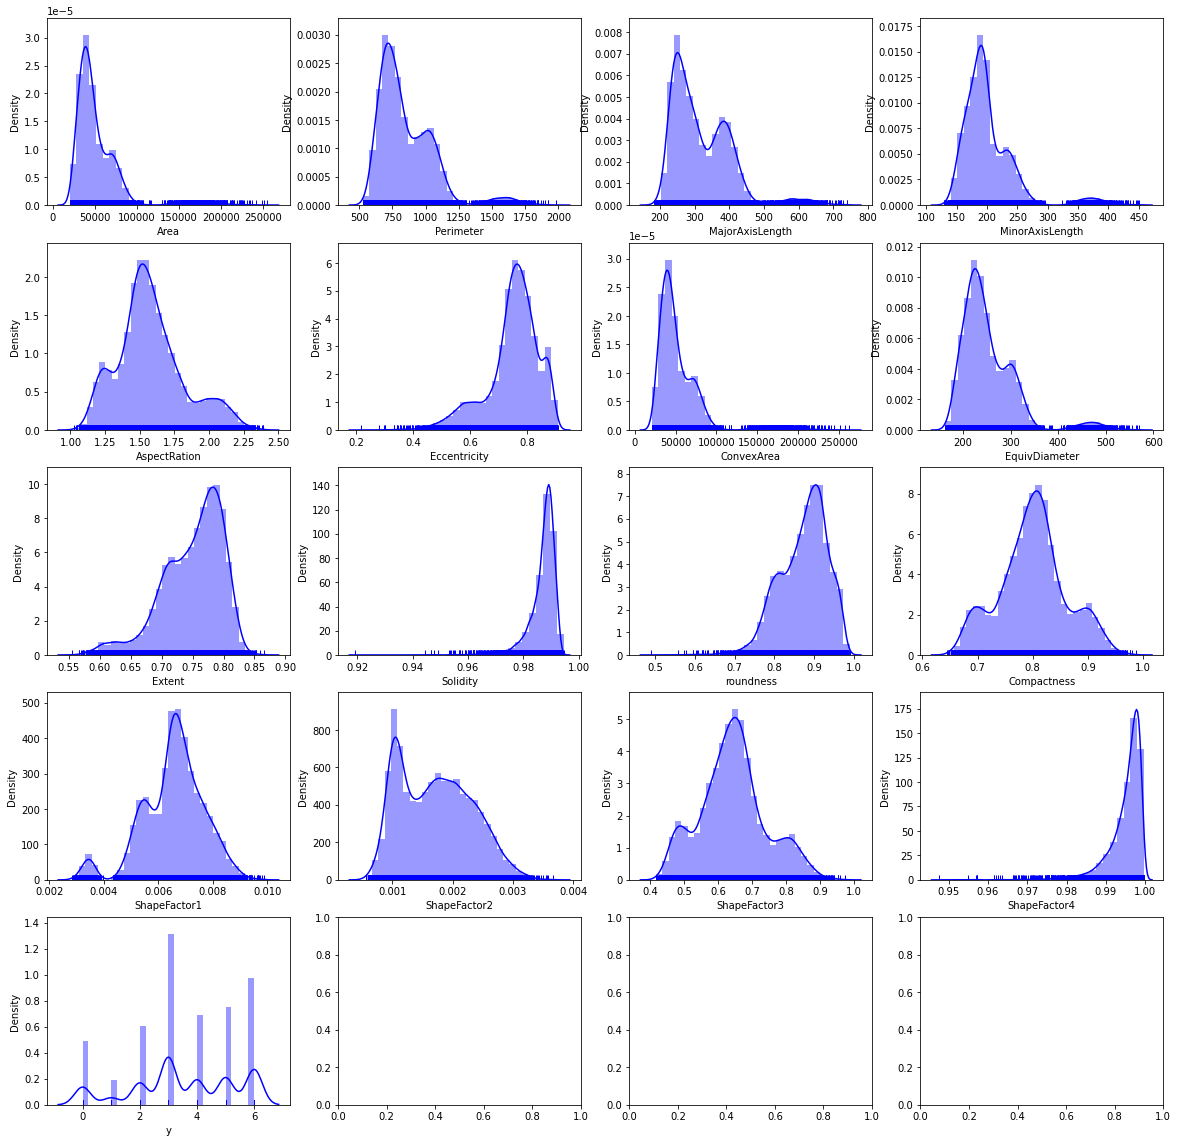

In [12]:
r = 5
c = 4
fig, axs = plt.subplots(r, c, figsize=(20, 20))

i = 0
j = 0
for column in train_df.drop(['ID'], axis=1).columns:
    sns.distplot(train_df[column], rug=True, bins=30, kde=True, hist=True, color='b', ax=axs[i, j])
    
    if(j == c-1):
        j = 0
        i += 1
    else:
        j += 1

# feature selection

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

x = train_df.drop(columns=['ID','y'])
y = train_df['y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.01,1,0.01)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=0
                      )


In [14]:
search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             scoring='neg_mean_squared_error')

In [15]:
search.best_params_

{'model__alpha': 0.01}

In [16]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [17]:
importance = np.abs(coefficients)
#print(importance)
features = x.columns[importance > 0]
print(features)

Index(['Area', 'Perimeter', 'AspectRation', 'Eccentricity', 'ConvexArea',
       'Extent', 'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor4'],
      dtype='object')


In [18]:
#print(df_copy.info())
#df_copy['y'].value_counts()
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1
#train_df = train_df[~((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1)]
median = float(train_df['Area'].median())
train_df["Area"] = np.where(((train_df < (Q1 - 1.5 * IQR)) |(train_df > (Q3 + 1.5 * IQR))).any(axis=1), 100000, train_df['Area'])


# Data preprocessing

In [19]:
def prepro(df):
    # Min-Max scaling skewed cols 
    skewness=[]
    for column in df.columns :
        if abs(skew(df[column])) > 1:
            skewness.append(column)
    print(skewness)
    columns=['Area','Eccentricity','ConvexArea','Solidity','ShapeFactor4']
    #Drop outliers Not working
    
    #x = df[columns].values #returns a numpy array
    #min_max_scaler = preprocessing.MinMaxScaler()
    #x_scaled = min_max_scaler.fit_transform(x)
    #df[columns] = pd.DataFrame(x_scaled)
    #Scale  using log transform 
    #for column in features:
    #    df[column] = np.log1p(df[column])
    # Clustering the data by K-means Algorithm
    kmeans = KMeans(n_clusters= 10, random_state=0,n_init=30, max_iter=10000)
    if 'y' in df.columns :
        df['data_clusters']= kmeans.fit_predict(df.values)
    else:
        df['data_clusters']= kmeans.fit_predict(df.values)
    #features.append(data_clusters)
    return df

In [20]:
print(features)


Index(['Area', 'Perimeter', 'AspectRation', 'Eccentricity', 'ConvexArea',
       'Extent', 'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor4'],
      dtype='object')


# Train Validation split

In [21]:
from sklearn.model_selection import train_test_split
x = train_df[features]
y = train_df['y']

#x = prepro(x)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


In [22]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(colsample_bytree=0.3,
                 gamma=0,             
                 learning_rate=0.05, eval_metric ='mae',
                 max_depth=2,
                 min_child_weight=2,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.5,
                 reg_lambda=0.2,
                 subsample=0.5,
                 seed=42) 

model_xgb.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eval_metric='mae',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=2, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=42,
              reg_alpha=0.5, reg_lambda=0.2, scale_pos_weight=None, seed=42,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [23]:
from sklearn.metrics import accuracy_score
y_pred = model_xgb.predict(x_val)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_val, predictions)
print("Accuracy Test: %.2f%%" % (accuracy * 100.0))

accuracy = accuracy_score(y_train, model_xgb.predict(x_train))
print("Accuracy Train: %.2f%%" % (accuracy * 100.0))

data = pd.read_csv("../input/dry-bean-dataset/Dry_Bean.csv")
data = encode(data,'Class')
X = data[features]
Y = data['Class']
#X = prepro(X)
accuracy = accuracy_score(Y, model_xgb.predict(X))
print("Accuracy all: %.2f%%" % (accuracy * 100.0))


Accuracy Test: 93.77%
Accuracy Train: 96.15%
Accuracy all: 95.05%


In [24]:
x_test = test_df[features]
y_hat = model_xgb.predict(x_test)
test_df['y'] = y_hat
test_df = decode(test_df,'y')
test_df[['ID', 'y']].to_csv('/kaggle/working/sample_submission.csv', index=False)